<a href="https://colab.research.google.com/github/En4ik10/estate/blob/main/model_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [7]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 99.3MB/s]


In [8]:
!chmod 600 /content/kaggle.json

In [9]:
import zipfile

with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
      zip_ref.extractall('house_prices_data')

In [202]:
train_data = pd.read_csv('house_prices_data/train.csv')
test_data = pd.read_csv('house_prices_data/test.csv')

In [117]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<ipython-input-89-16e016a3313a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.2});


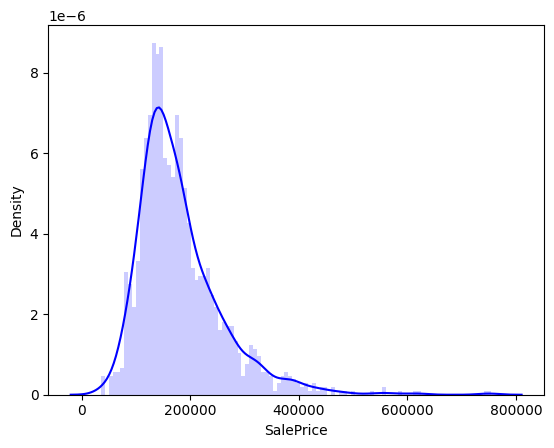

In [89]:
sns.distplot(train_data['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.2});

***Where is the value Nan, you can put 0 except GarageYrBlt***

In [206]:
train_data[train_data.isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [91]:
train_data['Id'].loc[train_data['GarageYrBlt'].isna()].count()

81

In [204]:
train_data['GarageYrBlt'].fillna(int(train_data['GarageYrBlt'].mean()), inplace=True)
train_data.fillna(0, inplace=True)

In [207]:
train_data = pd.get_dummies(train_data)

In [188]:
test_data['GarageYrBlt'].fillna(int(test_data['GarageYrBlt'].mean()), inplace=True)
test_data.fillna(0, inplace=True)
test_data = pd.get_dummies(test_data)

In [196]:
test_data[list(set(train_data.columns) - set(test_data.columns))] = False

In [190]:
train_data[list(set(test_data.columns) - set(train_data.columns))] = False #Нужно добавить в train данные, чтобы столбцы были одинаковые (как в test)

In [191]:
test_data = test_data.reindex(columns=train_data.columns)
test_data.drop(['SalePrice'], axis=1, inplace=True)

**Разделение данных на признаки и целевую переменную**

In [192]:
X = train_data.drop('SalePrice', axis=1)  # Признаки
y = train_data['SalePrice']  # Целевая переменная

In [193]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model  import LinearRegression

#model = RandomForestRegressor()
#model.fit(X_train, y_train)

params = {'n_estimators':100,
          'max_depth':12,
          'criterion':'squared_error',
          'learning_rate':0.05,
          'min_samples_leaf':16,
          'min_samples_split':16
          }


gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
# Предсказание на валидационной выборке
y_pred = gbr.predict(X_val)

# Оценка модели
mse = mean_squared_error(y_val, y_pred)
mse

844092197.9655915

In [199]:
predictions = gbr.predict(test_data)

In [200]:
submission = pd.DataFrame({
    'Id': test_data['Id'],  # Не забудьте оставить идентификатор
    'SalePrice': predictions
})

submission.to_csv('submission.csv', index=False)